In [1]:
import pandas as pd
import networkx as nx
from matplotlib.pyplot import figure
from utils.data_generated import load_movie_metadata

In [2]:
#https://towardsdatascience.com/from-dataframe-to-network-graph-bbb35c8ab675

In [3]:
MOVIE_DATASET = "../data/cmu_movie_summary_corpus/movie.metadata.tsv"
CHARACTER_DATASET = "../data/cmu_movie_summary_corpus/character.metadata.tsv"

In [4]:
metadata_df = load_movie_metadata()
metadata_df.head()

,movie_id_wikipedia,movie_id_freebase,title_id_imdb,movie_name,release_date,box_office_revenue,runtime,languages,countries,is_adult,genres_cmu,genres_imdb
0,975900,/m/03vyhn,tt0228333,Ghosts of Mars,2001-08-24,14010832.0,98.0,[English Language],[United States of America],0,"[Thriller, Science Fiction, Horror, Adventure,...","[Action, Horror, Sci-Fi]"
4,28463795,/m/0crgdbh,tt0094806,Brun bitter,1988-01-01,NaN,83.0,[Norwegian Language],[Norway],0,"[Crime Fiction, Drama]","[Crime, Drama]"
6,261236,/m/01mrr1,tt0083949,A Woman in Flames,1983-01-01,NaN,106.0,[German Language],[Germany],0,[Drama],[Drama]
42,10408933,/m/02qc0j7,tt0029852,Alexander's Ragtime Band,1938-08-16,3600000.0,106.0,[English Language],[United States of America],0,"[Musical, Comedy, Black-and-white]","[Drama, Music, Musical]"
43,9997961,/m/06_y2j7,tt0200545,Contigo y aquí,1974-01-01,NaN,70.0,[Spanish Language],[Argentina],0,"[Musical, Drama, Comedy]","[Comedy, Drama, Musical]"


In [5]:
movie_df = pd.read_csv(MOVIE_DATASET, sep='\t', header=None)
movie_df.head()

,0,1,2,3,4,5,6,7,8
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [6]:
character_df = pd.read_csv(CHARACTER_DATASET, sep='\t', header=None)
character_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [7]:
NUM_MOVIES = 400

def create_actor_pairs(actors):
    actor_pairs = []
    for i in range(len(actors) - 1):
        for j in range(i + 1, len(actors)):
            actor_pairs.append((actors[i], actors[j]))
    return actor_pairs

count = 0
actor_pairs_df = pd.DataFrame(columns=['Movie','Actor1','Actor2'])
for _, row in movie_df.iterrows():
    movie_name = row[2]
    actors = character_df[character_df[0] == row[0]][8]
    actor_pairs = create_actor_pairs(actors.tolist())
    for actor_pair in actor_pairs:
        if actor_pair[0] != actor_pair[1]:
            actor_pair_df = pd.DataFrame([[movie_name, actor_pair[0], actor_pair[1]]], columns=['Movie','Actor1','Actor2'])
            actor_pairs_df = pd.concat([actor_pairs_df, actor_pair_df], ignore_index = True)
    if count == NUM_MOVIES:
        break
    count = count + 1
        
print(len(movie_df))
print(len(actor_pairs_df))
actor_pairs_df.head()

81741
11990


,Movie,Actor1,Actor2
0,Ghosts of Mars,Wanda De Jesus,Natasha Henstridge
1,Ghosts of Mars,Wanda De Jesus,Ice Cube
2,Ghosts of Mars,Wanda De Jesus,Jason Statham
3,Ghosts of Mars,Wanda De Jesus,Clea DuVall
4,Ghosts of Mars,Wanda De Jesus,Pam Grier


In [8]:
G = nx.Graph()
G = nx.from_pandas_edgelist(actor_pairs_df, 'Actor1', 'Actor2')

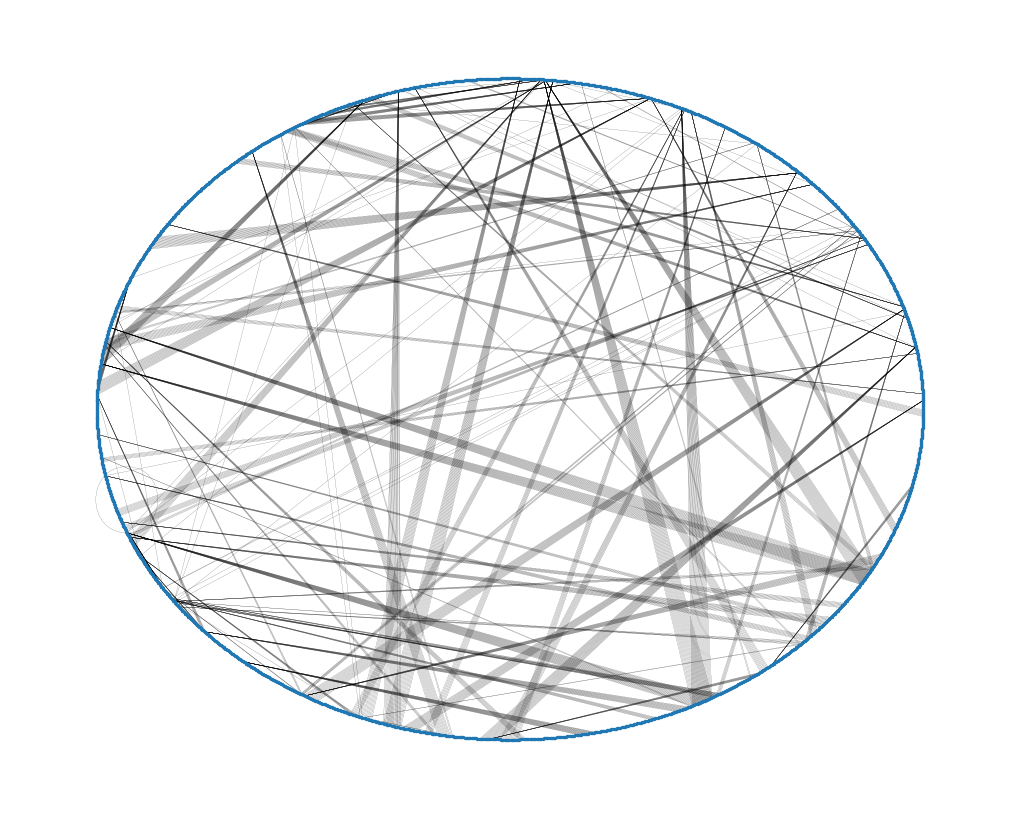

In [9]:
figure(figsize=(10, 8))
nx.draw_circular(G, with_labels=False, node_size=2, width=0.1)

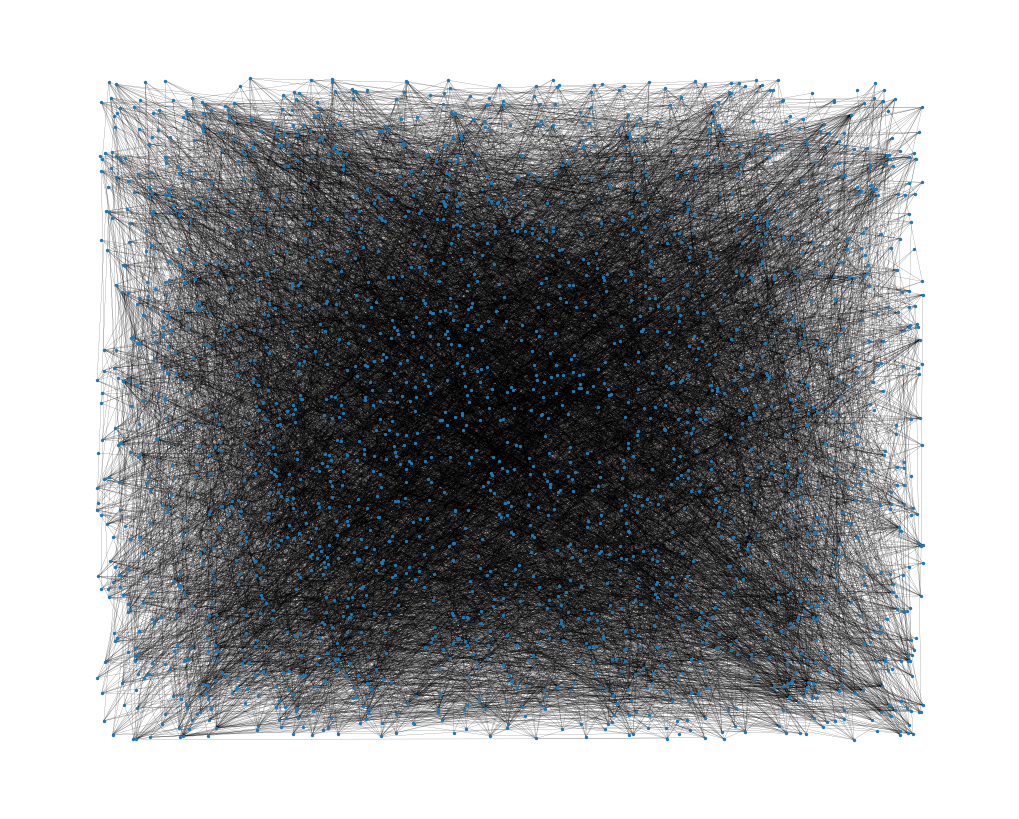

In [10]:
figure(figsize=(10, 8))
nx.draw_random(G, with_labels=False, node_size=2, width=0.1)

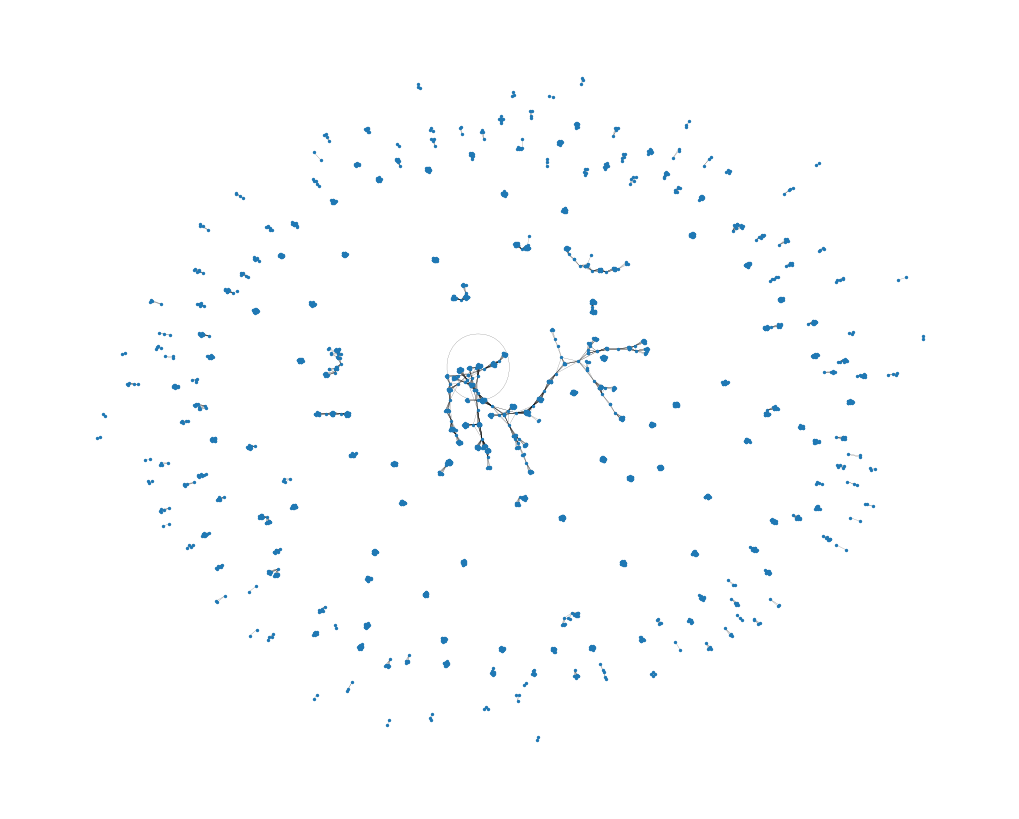

In [11]:
figure(figsize=(10, 8))
nx.draw_spring(G, with_labels=False, node_size=2, width=0.1)

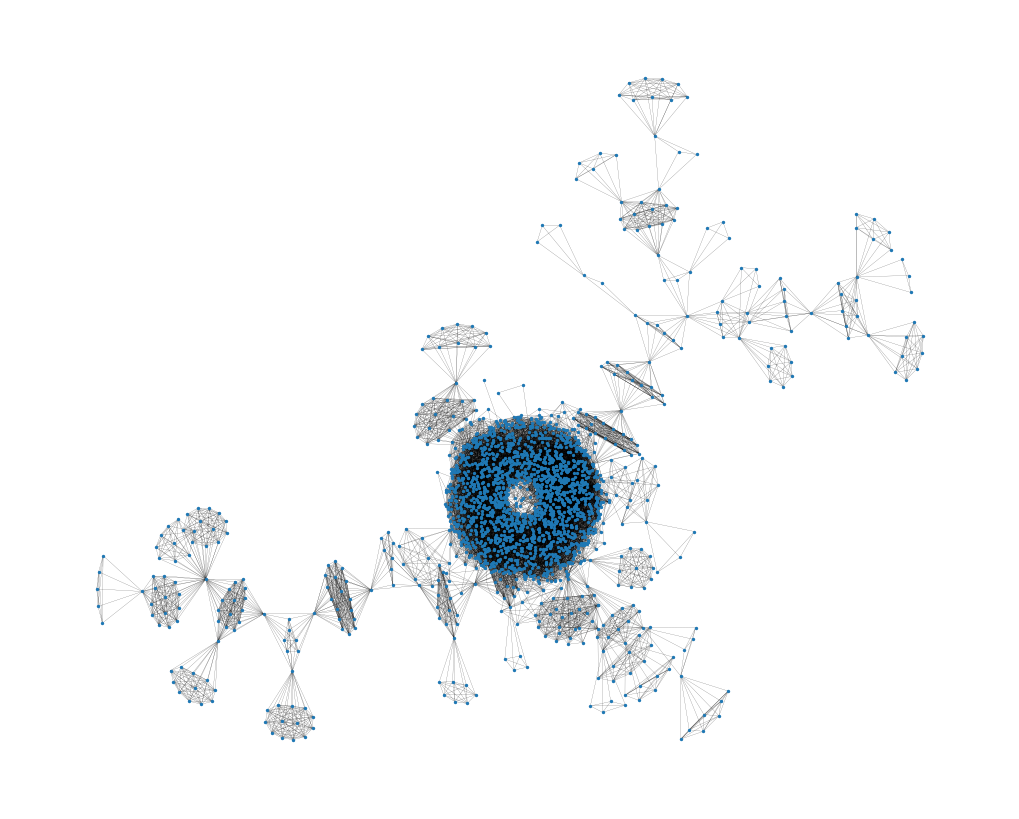

In [12]:
figure(figsize=(10, 8))
nx.draw_kamada_kawai(G, with_labels=False, node_size=2, width=0.1)

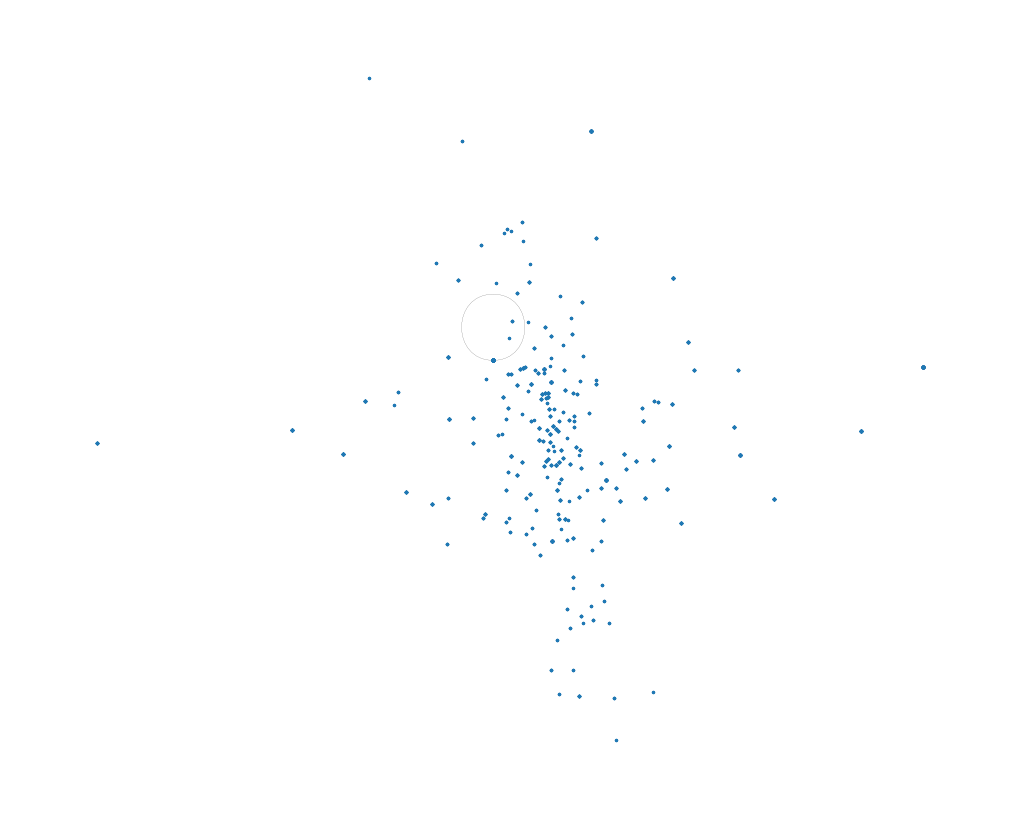

In [13]:
figure(figsize=(10, 8))
nx.draw_spectral(G, with_labels=False, node_size=2, width=0.1)

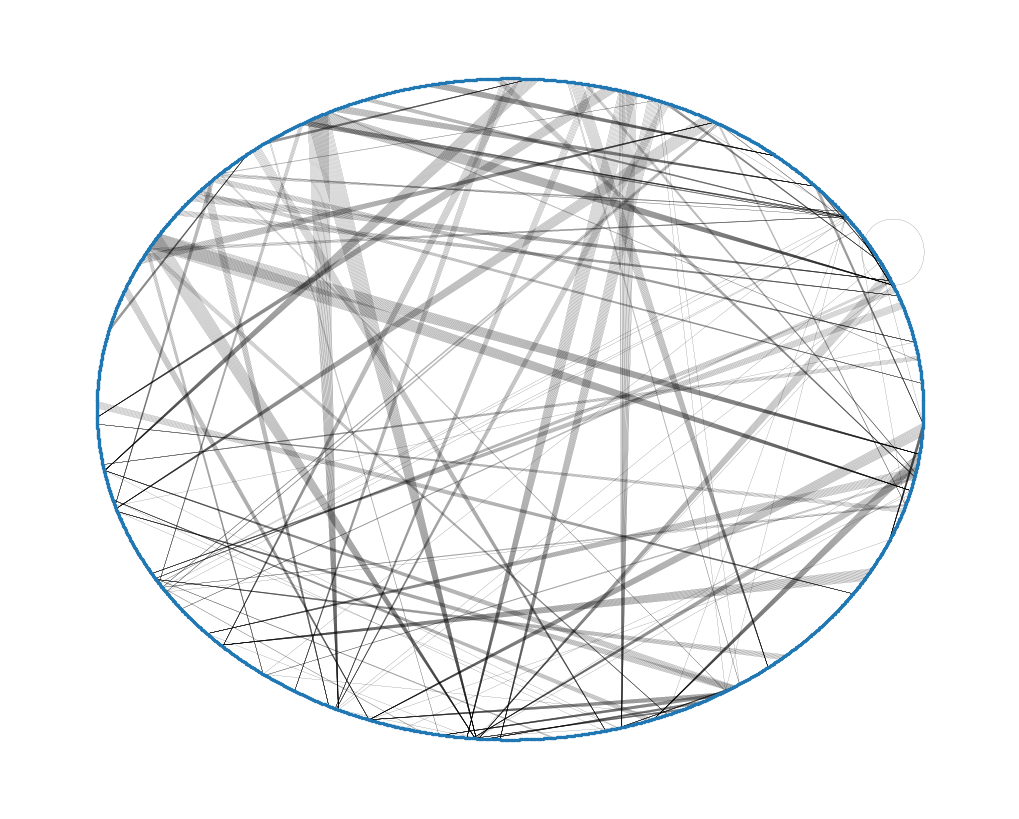

In [14]:
figure(figsize=(10, 8))
nx.draw_shell(G, with_labels=False, node_size=2, width=0.1)